In [121]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, show
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Exercice 8

In [2]:
Auto=load_data("Auto")

In [3]:
Auto=Auto.set_index("name")

In [4]:
ModelSpec= MS(['horsepower'])
X=ModelSpec.fit_transform(Auto)
print(X[0:4])
y=Auto['mpg']
model=sm.OLS(y,X)
results=model.fit()
summarize(results) #There is a small relationship between predictor and response, which is negative

                           intercept  horsepower
name                                            
chevrolet chevelle malibu        1.0         130
buick skylark 320                1.0         165
plymouth satellite               1.0         150
amc rebel sst                    1.0         150


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [5]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

In [6]:
#What is the predicted mpg associated with a horsepower of
#98? What are the associated 95 % confidence and prediction
#intervals?
new_df = pd.DataFrame ({'horsepower':[98]})
newX = ModelSpec.transform(new_df)
pred=results.get_prediction(newX)
pred.predicted_mean

array([24.46707715])

In [7]:
pred.conf_int(alpha =0.05) #confidence

array([[23.97307896, 24.96107534]])

In [8]:
pred.conf_int(obs=True, alpha =0.05) #prediction

array([[14.80939607, 34.12475823]])

In [9]:
def abline(ax , b, m, *args , ** kwargs):
    #"Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

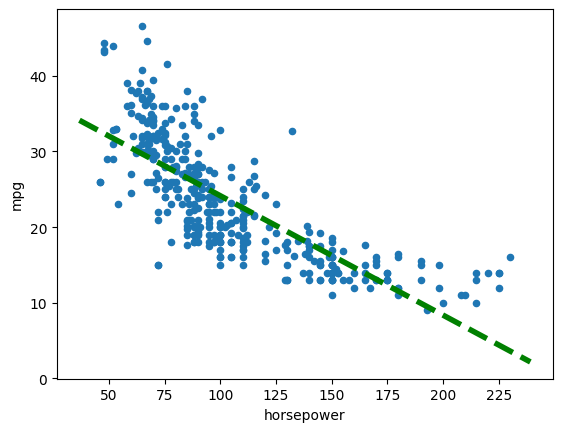

In [10]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,results.params[0],results.params[1],'g--',linewidth=4)

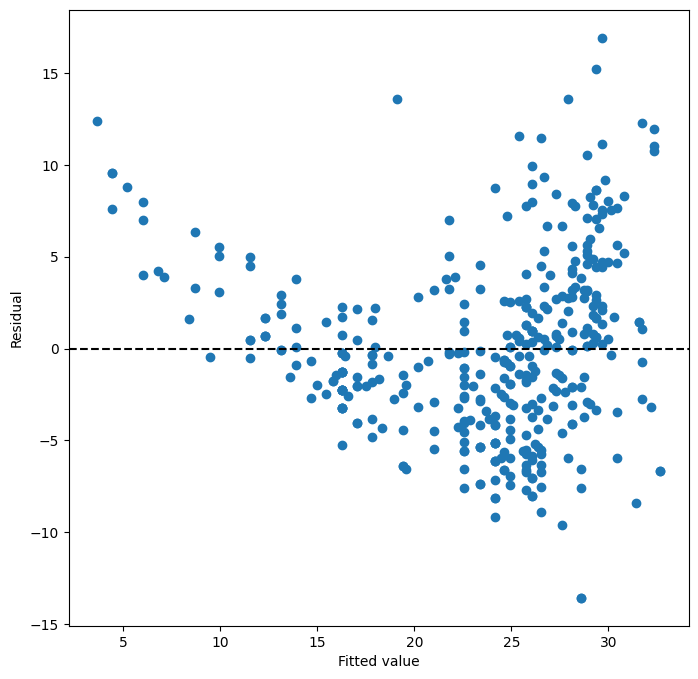

In [11]:
ax = subplots(figsize=(8,8))[1] #non linearity
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

115

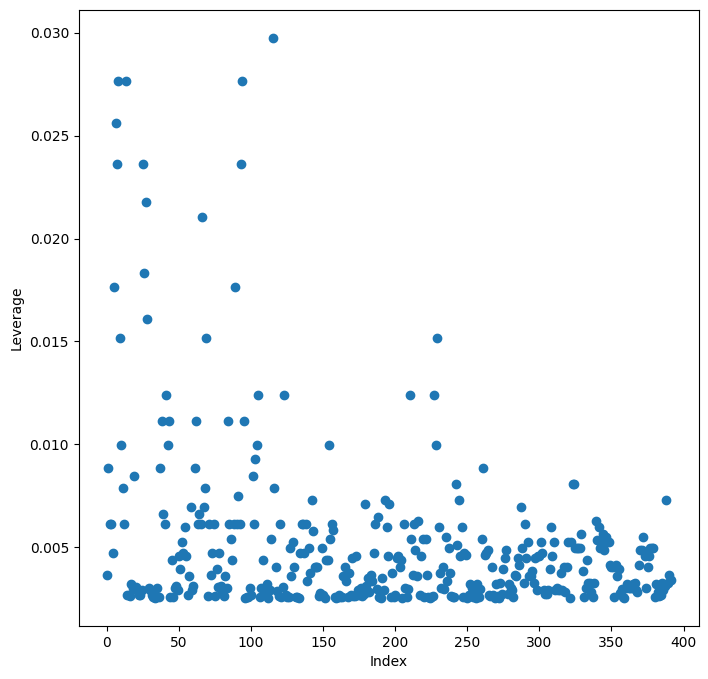

In [12]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Exercice 9

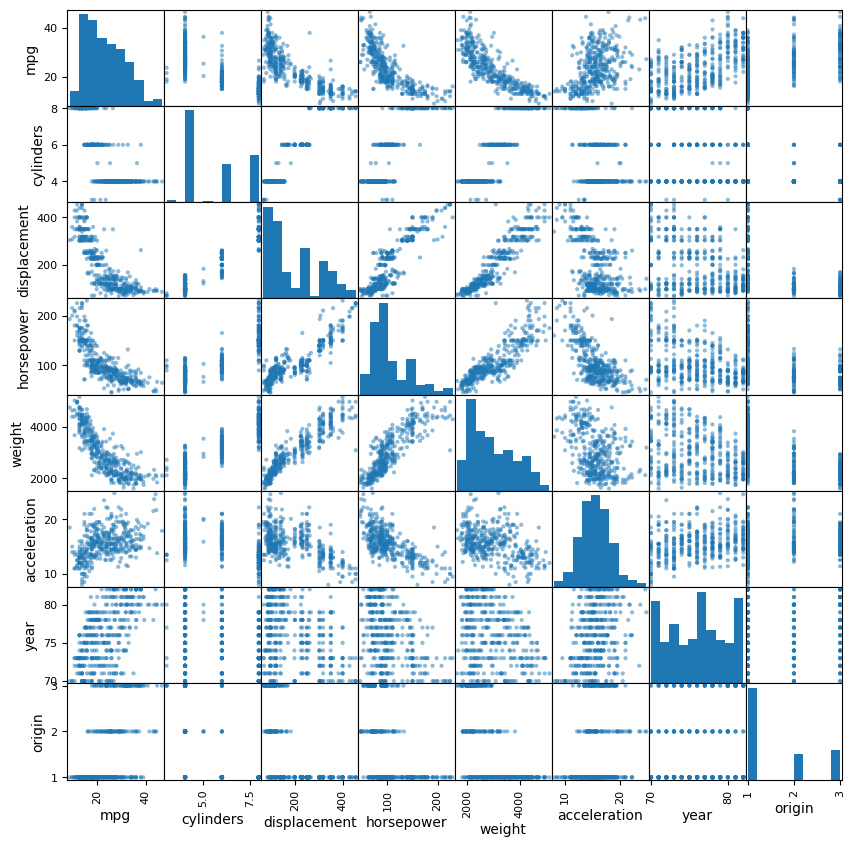

In [13]:
pd.plotting.scatter_matrix(Auto, figsize=(10,10));

In [14]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [15]:
Auto.columns.drop('mpg')

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [16]:
ModelSpec= MS(Auto.columns.drop('mpg'))
X=ModelSpec.fit_transform(Auto)
y=Auto['mpg']
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [17]:
results.summary() #Large F-statistic so relation between predictors and response. Year, origin and weight seems to have high relation based on p-values
# As the year increases, the mpg (miles per gallon) increases too
#How to use anova with MS: https://github.com/statsmodels/statsmodels/issues/8241

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        09:31:01   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

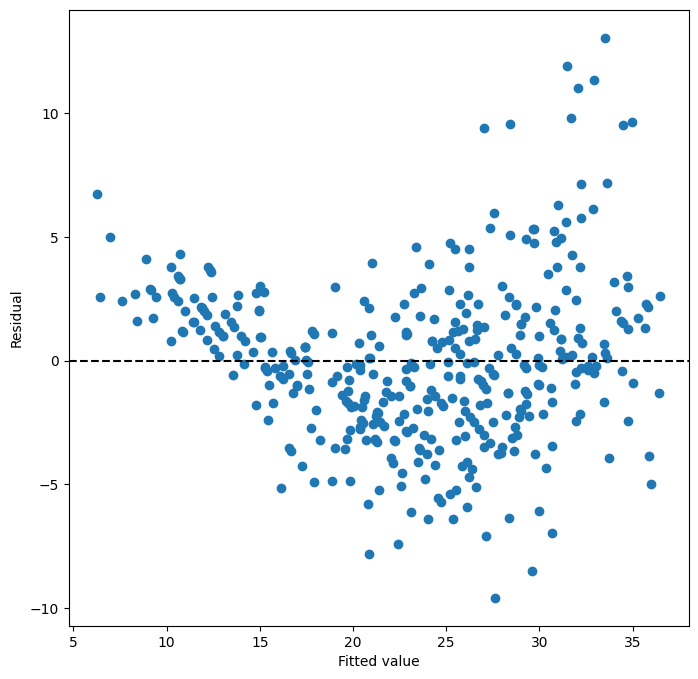

In [18]:
ax = subplots(figsize=(8,8))[1] #non linearity
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

13

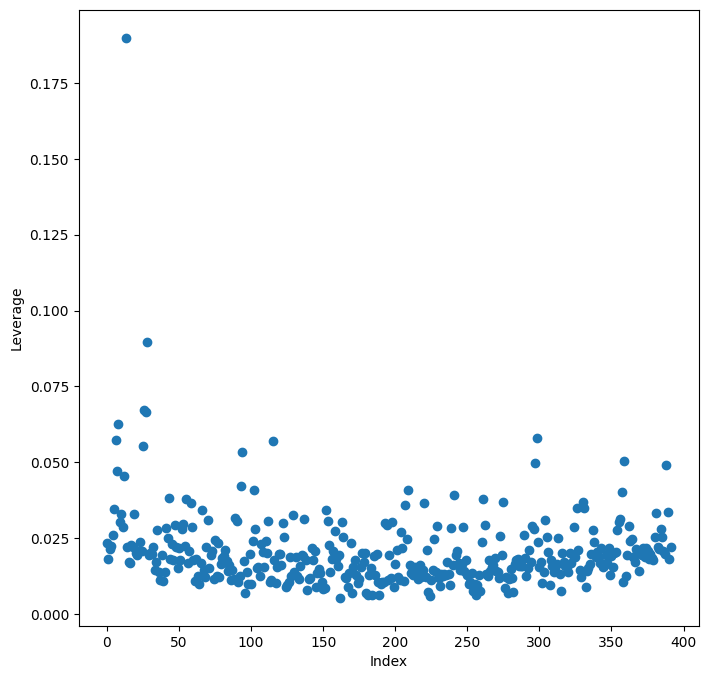

In [19]:
infl = results.get_influence() #1 point with high leverage
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [20]:
ModelSpec= MS(["horsepower","weight","displacement","weight",("horsepower","displacement"),("acceleration","weight"),("origin","weight")])
X=ModelSpec.fit_transform(Auto)
y=Auto['mpg']
model=sm.OLS(y,X)
results=model.fit()
summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     207.1
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          3.41e-117
Time:                        09:31:03   Log-Likelihood:                -1078.7
No. Observations:                 392   AIC:                             2171.
Df Residuals:                     385   BIC:                             2199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  53.8463      1.596     33.737      0.000      50.708      56.984
horsepower                 -0.2292      0.024     -9.595      0.000      -0.276      -0.182
weight                     -0.0004      0.001     -0.575      0.566      -0.002       0.001
displacement               -0.0664      0.010     -6.356      0.000      -0.087      -0.046
weight                     -0.0004      0.001     -0.575      0.566      -0.002       0.001
horsepower:displacement     0.0005   5.59e-05      8.568      0.000       0.000       0.001
acceleration:weight     -9.275e-05   3.94e-05     -2.351      0.019      -0.000   -1.52e-05
origin:weight               0.0003      0.000      2.395      0.017    5.98e-05       0.001
==============================================================================
Omnibus:                       41.819   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.689
Skew:                           0.656   Prob(JB):                     2.71e-16
Kurtosis:                       4.633   Cond. No.                     3.65e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.79e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

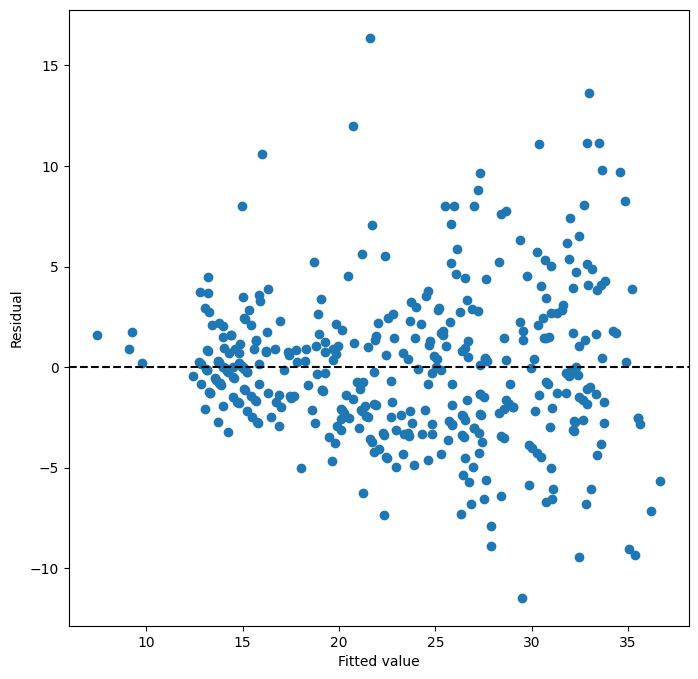

In [21]:
ax = subplots(figsize=(8,8))[1] #non linearity
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [22]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [23]:
ModelSpec= MS([poly("horsepower",degree=3),"displacement","weight","year"])
X=ModelSpec.fit_transform(Auto)
y=Auto['mpg']
model=sm.OLS(y,X)
results=model.fit()
summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     370.7
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          1.44e-156
Time:                        09:31:03   Log-Likelihood:                -986.13
No. Observations:                 392   AIC:                             1986.
Df Residuals:                     385   BIC:                             2014.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       -18.0855      3.569     -5.067      0.000     -25.104     -11.067
poly(horsepower, degree=3)[0]   -11.5139      7.508     -1.534      0.126     -26.276       3.248
poly(horsepower, degree=3)[1]    30.5362      3.288      9.288      0.000      24.072      37.000
poly(horsepower, degree=3)[2]   -15.1019      3.125     -4.832      0.000     -21.246      -8.957
displacement                     -0.0082      0.005     -1.706      0.089      -0.018       0.001
weight                           -0.0048      0.001     -8.814      0.000      -0.006      -0.004
year                              0.7576      0.046     16.412      0.000       0.667       0.848
==============================================================================
Omnibus:                       22.996   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.919
Skew:                           0.388   Prob(JB):                     3.54e-09
Kurtosis:                       4.335   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise 10

In [24]:
Carseats=load_data("Carseats")

In [25]:
ModelSpec= MS(['Price',"Urban","US"])
X=ModelSpec.fit_transform(Carseats)
print(X[0:4])
y=Carseats['Sales']
model=sm.OLS(y,X)
results=model.fit()
results.summary() #When all the other parameters are fixed. Higher price, lower sales. If Urban store, lower sales (but very high p value). Higher sales if in the US
#Y=13.04 -0.05*Price -0.02[Urban==1] +1.2 [US==1]
#We reject null hypothesis for price and US

   intercept  Price  Urban[Yes]  US[Yes]
0        1.0    120         1.0      1.0
1        1.0     83         1.0      1.0
2        1.0     80         1.0      1.0
3        1.0     97         1.0      1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        09:31:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
ModelSpec= MS(['Price',"US"]) #The R^2 value is the same so the models perform the same.
X=ModelSpec.fit_transform(Carseats)
print(X[0:4])
y=Carseats['Sales']
model=sm.OLS(y,X)
results=model.fit()
results.summary()

   intercept  Price  US[Yes]
0        1.0    120      1.0
1        1.0     83      1.0
2        1.0     80      1.0
3        1.0     97      1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.66e-24
Time:                        09:31:03   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

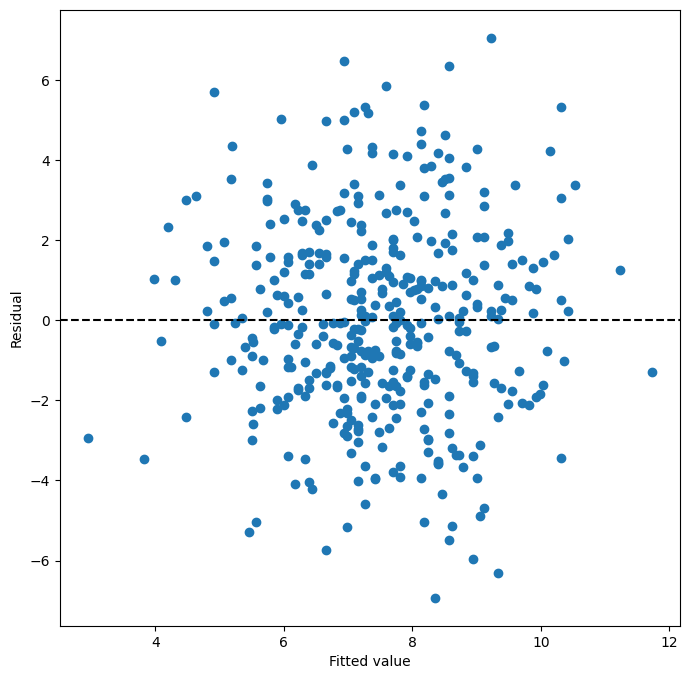

In [27]:
ax = subplots(figsize=(8,8))[1] #no particular outlier
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

42

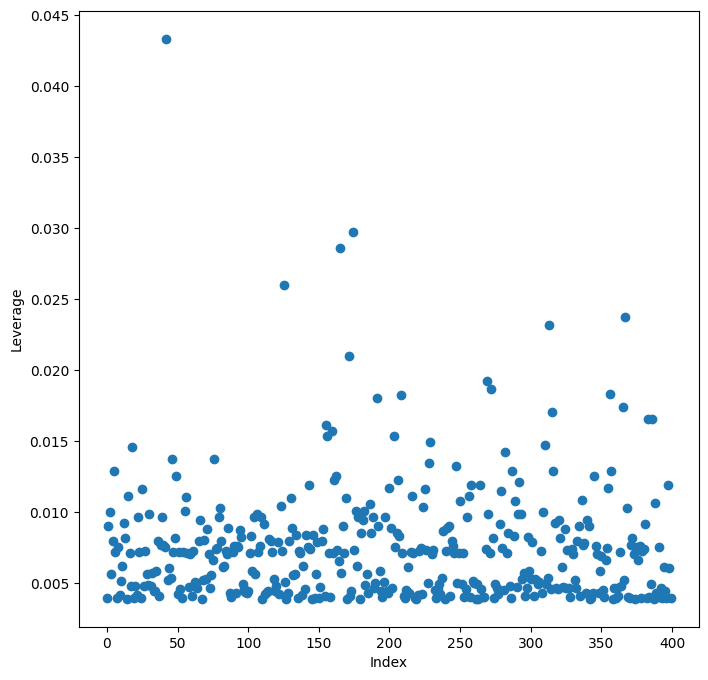

In [28]:
infl = results.get_influence() #1 observation with high leverage
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Exercise 11

In [29]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

In [30]:
model=sm.OLS(y,x)
results=model.fit()
results.summary() #The estimate is close to 2, the real value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        09:31:04   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model=sm.OLS(x,y)
results=model.fit()
results.summary() #Same t-statistic

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    6.23e-31
Time:                        09:31:04   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

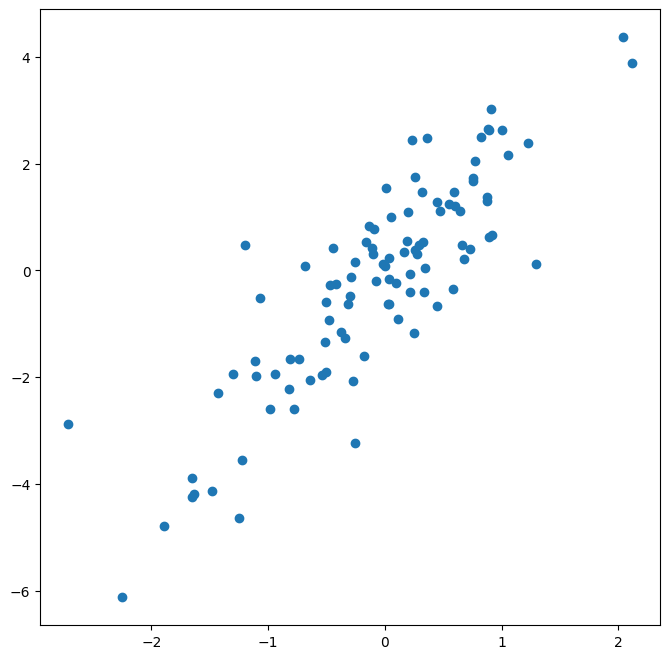

In [32]:
ax = subplots(figsize=(8,8))[1];
ax.scatter(x, y)

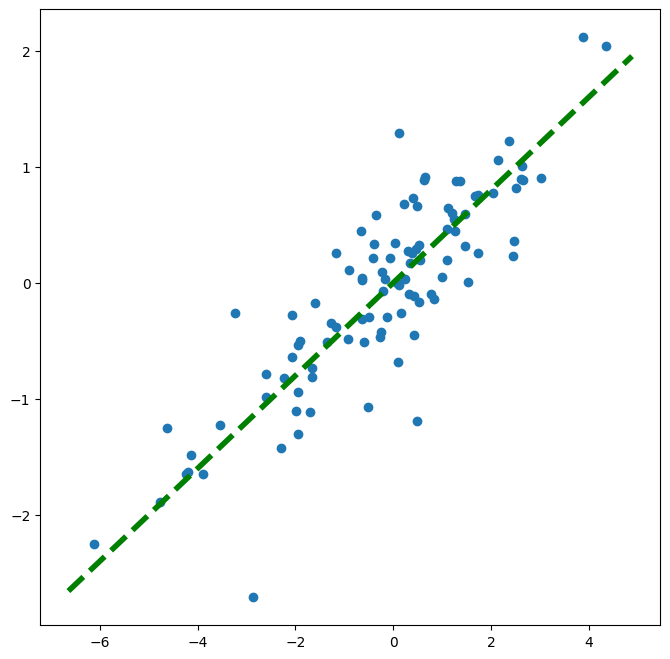

In [33]:
ax = subplots(figsize=(8,8))[1];
ax.scatter(y, x)
abline(ax,0,0.4,'g--',linewidth=4)

In [34]:
#The coefficient are not inverse of each other because there is not an exact symmetry: see (3.38) for the expression of both coefficients. 

In [35]:
#Question (d) is "straightforward" then (e) the formula of t-statistic is symmetric in x and y

In [36]:
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        09:31:05   Log-Likelihood:                -141.06
No. Observations:                 100   AIC:                             286.1
Df Residuals:                      98   BIC:                             291.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0760      0.101     -0.756      0.451      -0.276       0.124
x1             1.9686      0.118     16.734      0.000       1.735       2.202
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
y2=sm.add_constant(y)
model=sm.OLS(x,y2)
results=model.fit()
results.summary() #same value of t statistic for beta_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        09:31:05   Log-Likelihood:                -58.325
No. Observations:                 100   AIC:                             120.6
Df Residuals:                      98   BIC:                             125.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.044      0.216      0.829      -0.078       0.097
x1             0.3763      0.022     16.734      0.000       0.332       0.421
==============================================================================
Omnibus:                       13.123   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.501
Skew:                          -0.528   Prob(JB):                     1.30e-05
Kurtosis:                       5.070   Cond. No.                         1.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise 12

In [38]:
# (a) if the sum of squares of x_i is the same as the sum of squares of y_i

In [39]:
#(b) in the example of exercise 11, the coefficients are different

In [40]:
#To ensure the sum of squares is equal, we obtain y by shuffling x
import random as rd 
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = x.copy()
rd.shuffle(y)


In [41]:
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2205
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.640
Time:                        09:31:05   Log-Likelihood:                -125.71
No. Observations:                 100   AIC:                             255.4
Df Residuals:                      98   BIC:                             260.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0701      0.086     -0.813      0.418      -0.241       0.101
x1             0.0474      0.101      0.470      0.640      -0.153       0.248
==============================================================================
Omnibus:                        4.475   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.791
Skew:                          -0.422   Prob(JB):                        0.150
Kurtosis:                       3.444   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
y2=sm.add_constant(y)
model=sm.OLS(x,y2)
results=model.fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2205
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.640
Time:                        09:31:05   Log-Likelihood:                -125.71
No. Observations:                 100   AIC:                             255.4
Df Residuals:                      98   BIC:                             260.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0701      0.086     -0.813      0.418      -0.241       0.101
x1             0.0474      0.101      0.470      0.640      -0.153       0.248
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.598
Skew:                          -0.400   Prob(JB):                        0.165
Kurtosis:                       3.473   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

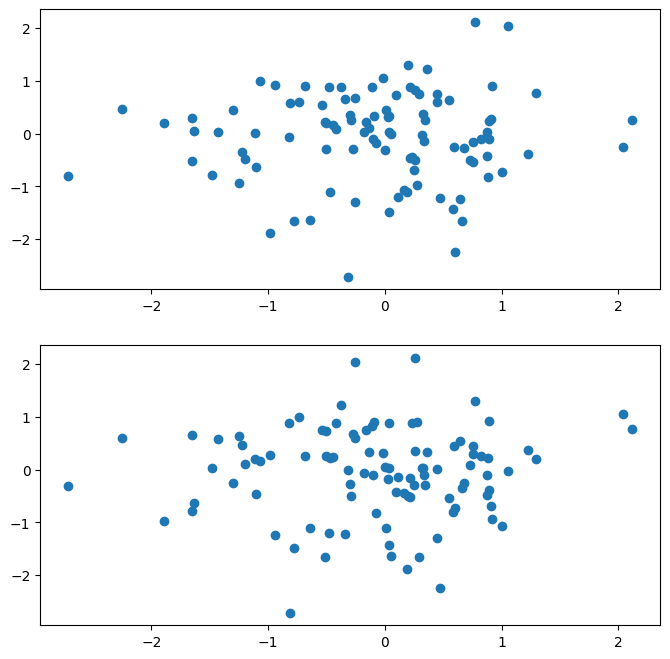

In [43]:
fig, ax = subplots(2,figsize=(8,8));
ax[0].scatter(x, y)
ax[1].scatter(y,x)
#Same coeff but not the same data

## Exercise 13

In [52]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
eps = rng.normal(scale=0.25,size =100)
y=-1+0.5*x+eps #beta_0=-1 and beta_1=0.5

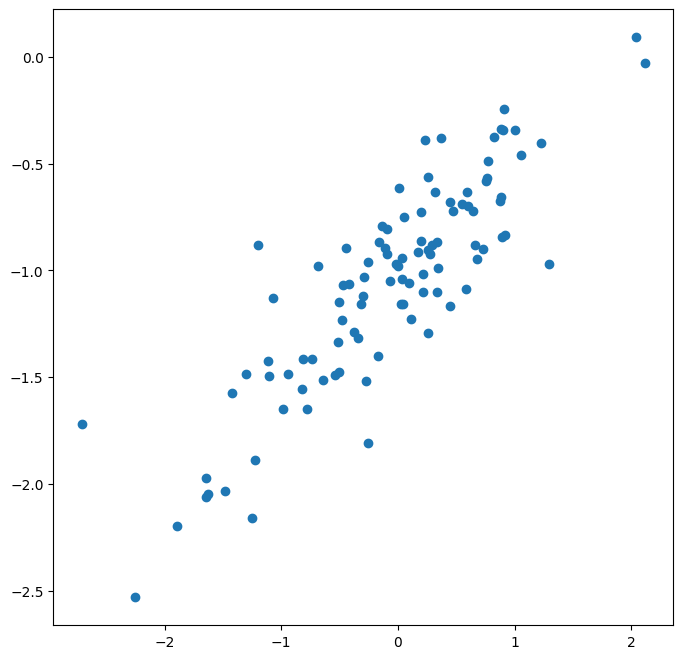

In [45]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x, y)

In [46]:
results=sm.OLS(y,sm.add_constant(x)).fit()
results.summary() # The coefficients are not far from the real values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        09:31:06   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

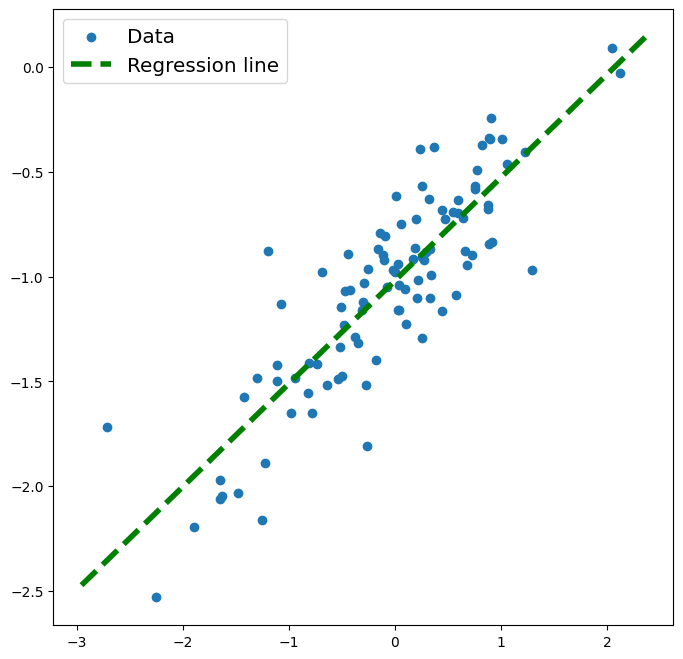

In [47]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x, y)
abline(ax,results.params[0],results.params[1],'g--',linewidth=4)
ax.legend(["Data","Regression line"], fontsize="x-large")

In [53]:
x2=x**2
results=sm.OLS(y,sm.add_constant(list(zip(x,x2)))).fit()
results.summary() # High p-value for x^2 and same R^2 statistic --> no reason to add x^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.74e-30
Time:                        09:34:49   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
eps = rng.normal(scale=0.02,size =100)
y=-1+0.5*x+eps 
results=sm.OLS(y,sm.add_constant(x)).fit()
results.summary() #very good R^2 Better fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.505e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.51e-132
Time:                        09:34:53   Log-Likelihood:                 250.14
No. Observations:                 100   AIC:                            -496.3
Df Residuals:                      98   BIC:                            -491.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0015      0.002   -498.021      0.000      -1.006      -0.998
x1             0.4994      0.002    212.247      0.000       0.495       0.504
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

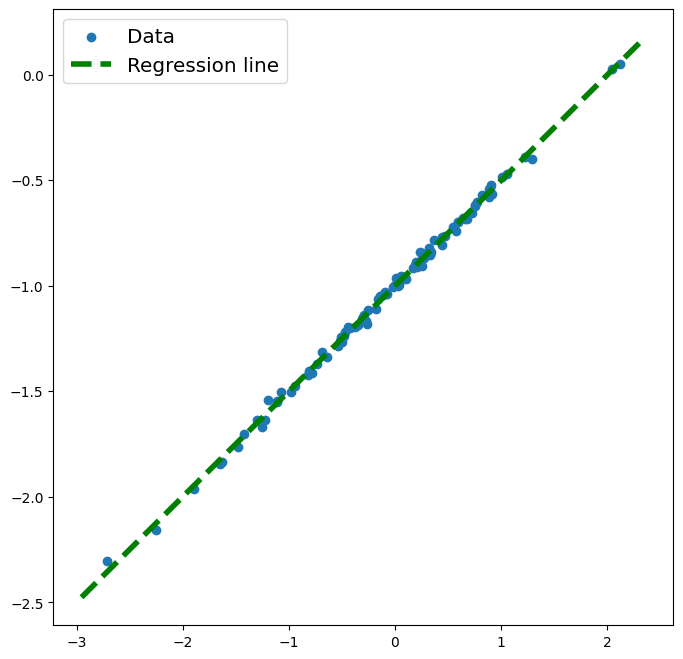

In [55]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x, y)
abline(ax,results.params[0],results.params[1],'g--',linewidth=4)
ax.legend(["Data","Regression line"], fontsize="x-large")

In [56]:
rng = np.random.default_rng (1)
x = rng.normal(size =100)
eps = rng.normal(scale=4,size =100)
y=-1+0.5*x+eps 
results=sm.OLS(y,sm.add_constant(x)).fit()
results.summary() #Not a good fit, too much variance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6328
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.428
Time:                        09:34:54   Log-Likelihood:                -279.69
No. Observations:                 100   AIC:                             563.4
Df Residuals:                      98   BIC:                             568.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3041      0.402     -3.242      0.002      -2.102      -0.506
x1             0.3743      0.471      0.795      0.428      -0.559       1.308
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

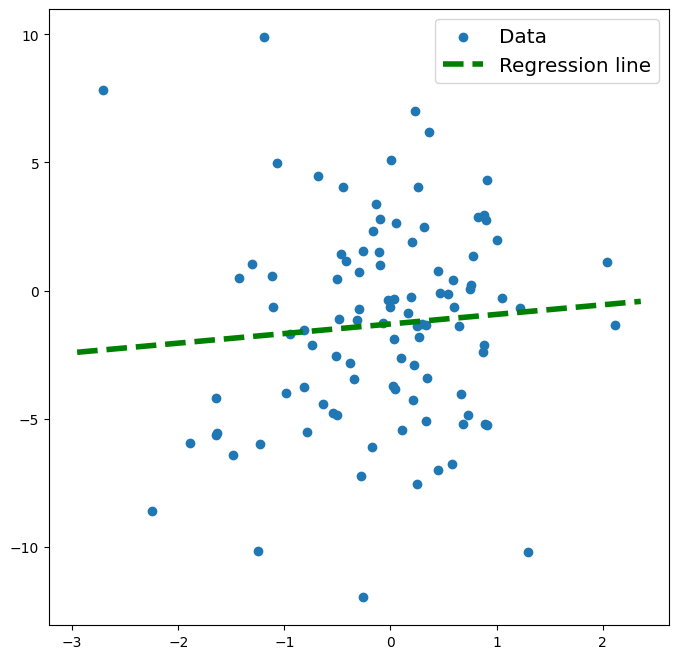

In [57]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x, y)
abline(ax,results.params[0],results.params[1],'g--',linewidth=4)
ax.legend(["Data","Regression line"], fontsize="x-large")

In [58]:
# More noise --> Bigger confidence intervals

## Exercise 14

In [63]:
rng = np.random.default_rng (10)
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)
#Beta_0=2 Beta_1=2 Beta_2=0.3

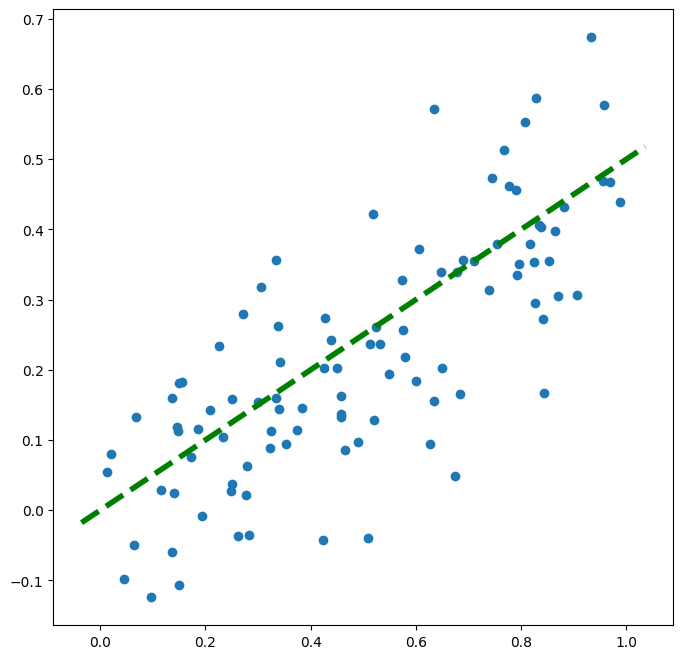

In [66]:
#x_2 is almost equal to 0.5 x_1
fig, ax = subplots(figsize=(8,8));
ax.scatter(x1, x2)
abline(ax,0,0.5,'g--',linewidth=4)

In [67]:
results=sm.OLS(y,sm.add_constant(list(zip(x1,x2)))).fit()
results.summary()
#good approx. of the intercept, but not of beta_1 and beta_2
#based on the results, we can't really reject the null hypothesis for beta_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.76e-08
Time:                        09:42:09   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
results=sm.OLS(y,sm.add_constant(x1)).fit()
results.summary() #we can reject the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.37e-08
Time:                        09:44:42   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
results=sm.OLS(y,sm.add_constant(x2)).fit()
results.summary() #we can reject the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           7.43e-07
Time:                        09:45:11   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.000       2.019       2.629
x1             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# (f) The results do not contradict each other because in the first regression, we test the significance of x_2 in the response if x_1 is fixed

In [72]:
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])

In [77]:
results=sm.OLS(y,sm.add_constant(list(zip(x1,x2)))).fit()
results.summary() # the coefficients are very different

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.60e-08
Time:                        09:58:48   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
results=sm.OLS(y,sm.add_constant(x1)).fit()
results.summary()  #slight difference in the coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           9.23e-07
Time:                        10:03:14   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

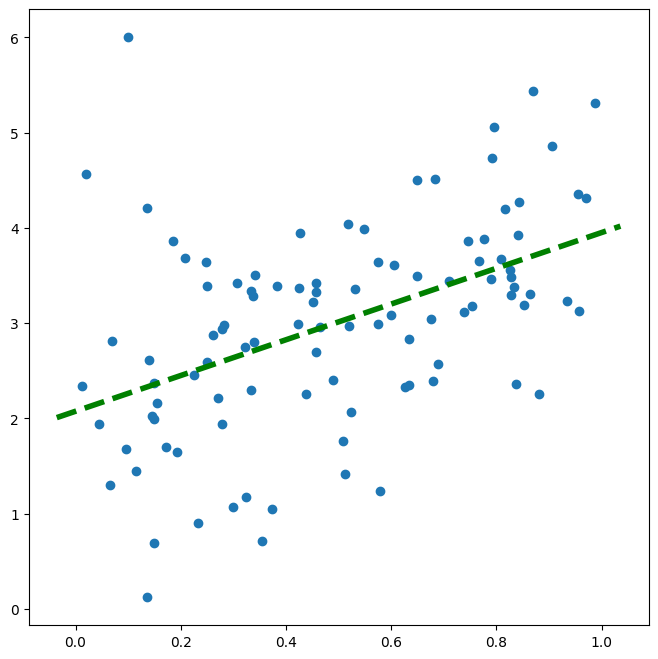

In [93]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x1, y)
abline(ax,results.params[0],results.params[1],'g--',linewidth=4) #the added point is at (0.1,6), it is an outlier (high value of y) 

In [83]:
results=sm.OLS(y,sm.add_constant(x2)).fit()
results.summary() #slight difference in the coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           3.13e-08
Time:                        10:00:53   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.000       1.984       2.584
x1             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

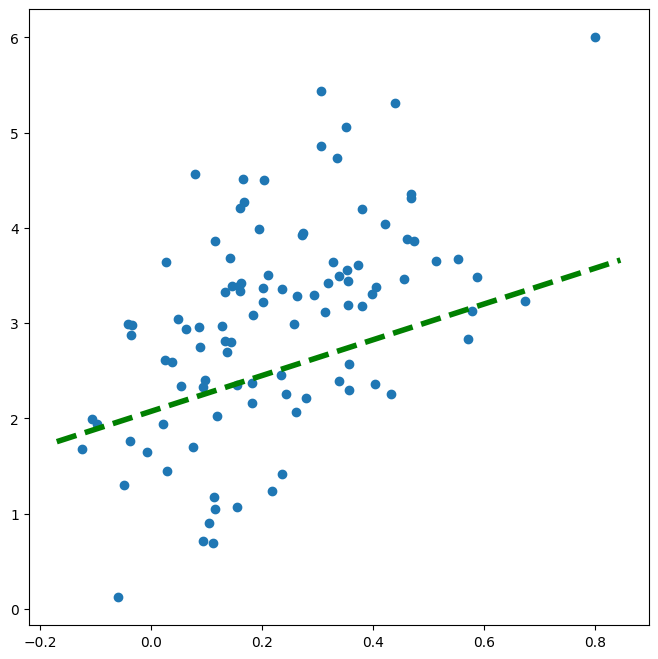

In [94]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(x2, y)
abline(ax,results.params[0],results.params[1],'g--',linewidth=4) #the added point is at the top right and the x2 value is high, leverage point. 

In [89]:
results.params

array([2.28401186, 3.14584863])

## Exercise 15

In [97]:
Boston=load_data("Boston")

Results for zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.51e-06
Time:                        11:53:53   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     

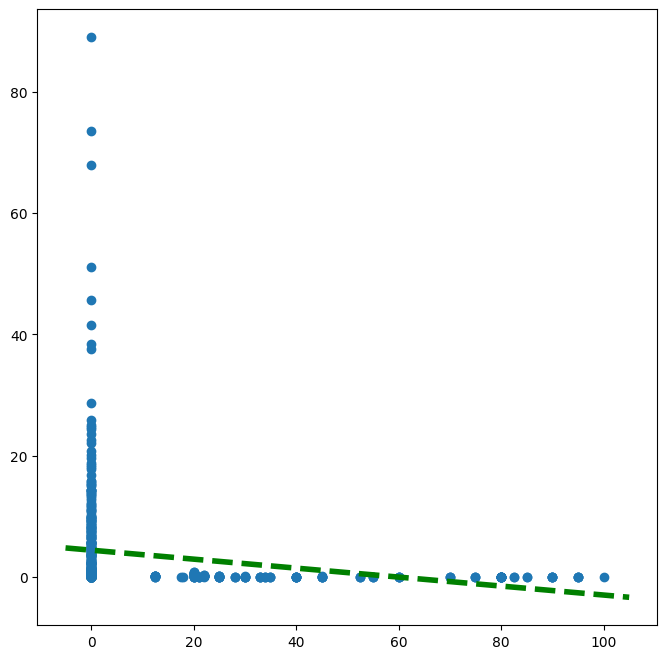

----------------------------------------------------------
Results for indus
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.45e-21
Time:                        11:53:54   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

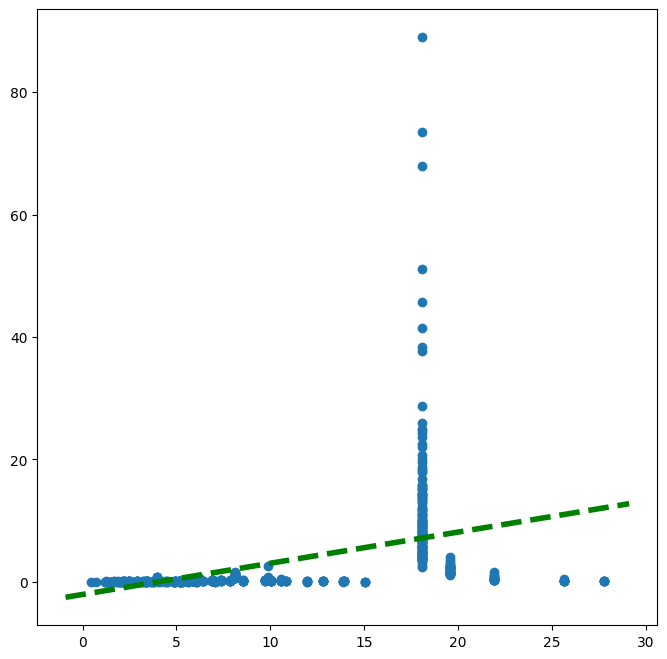

----------------------------------------------------------
Results for chas
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.209
Time:                        11:53:54   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

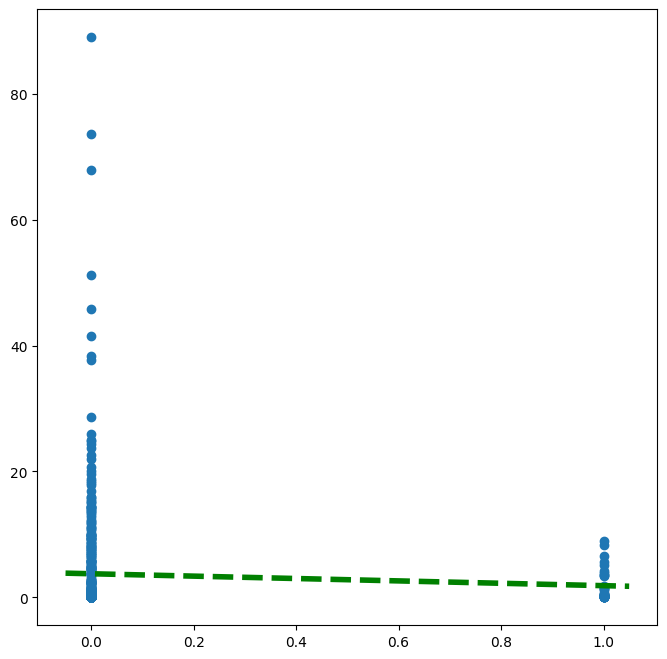

----------------------------------------------------------
Results for nox
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           3.75e-23
Time:                        11:53:54   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

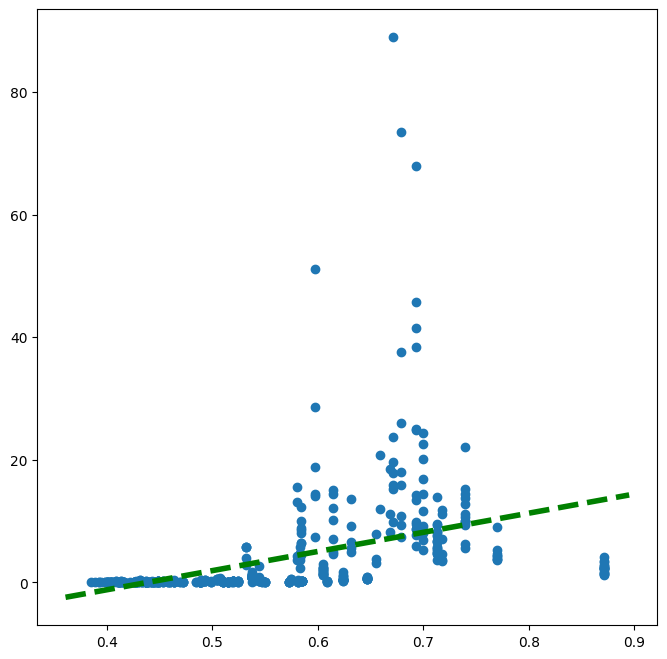

----------------------------------------------------------
Results for rm
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.35e-07
Time:                        11:53:55   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

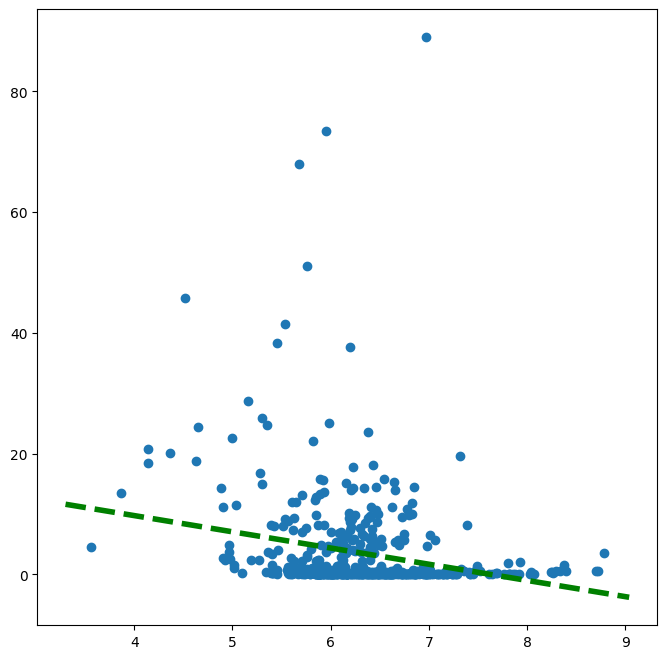

----------------------------------------------------------
Results for age
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.85e-16
Time:                        11:53:55   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

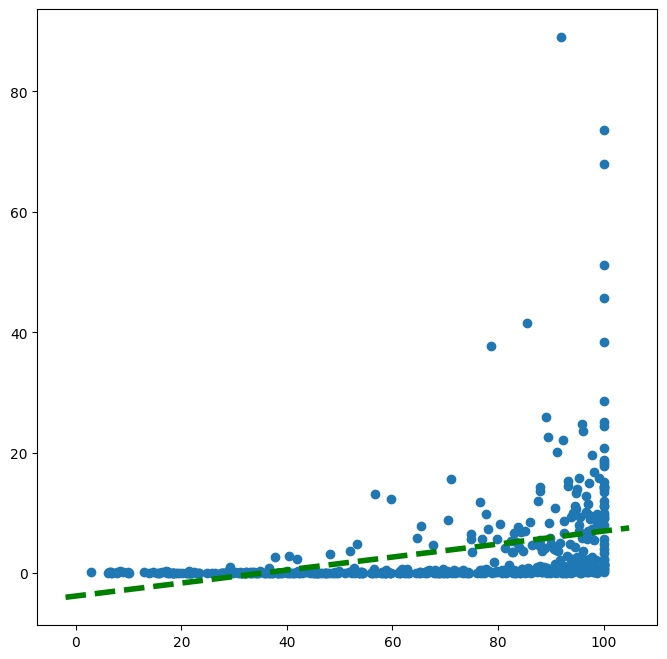

----------------------------------------------------------
Results for dis
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           8.52e-19
Time:                        11:53:55   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

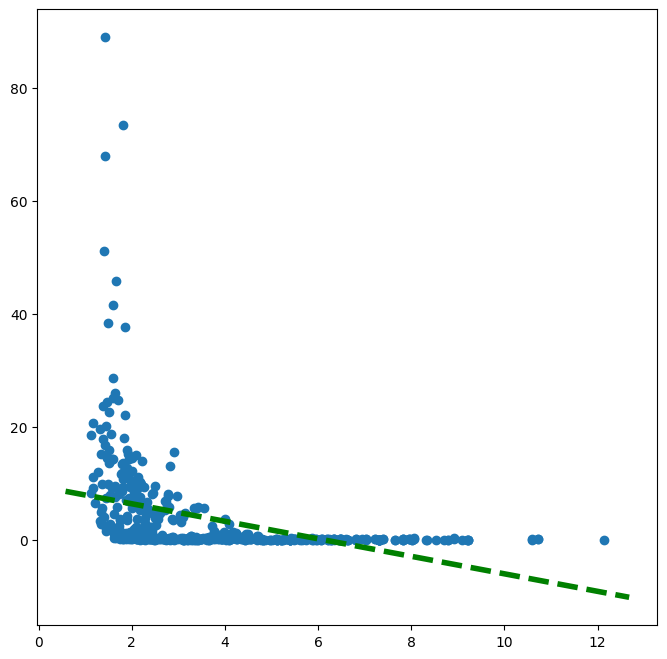

----------------------------------------------------------
Results for rad
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.69e-56
Time:                        11:53:55   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

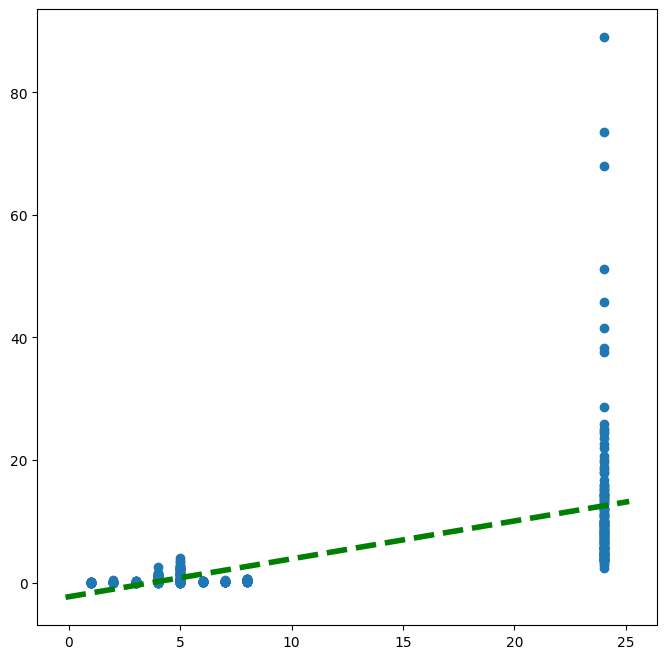

----------------------------------------------------------
Results for tax
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.36e-47
Time:                        11:53:56   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

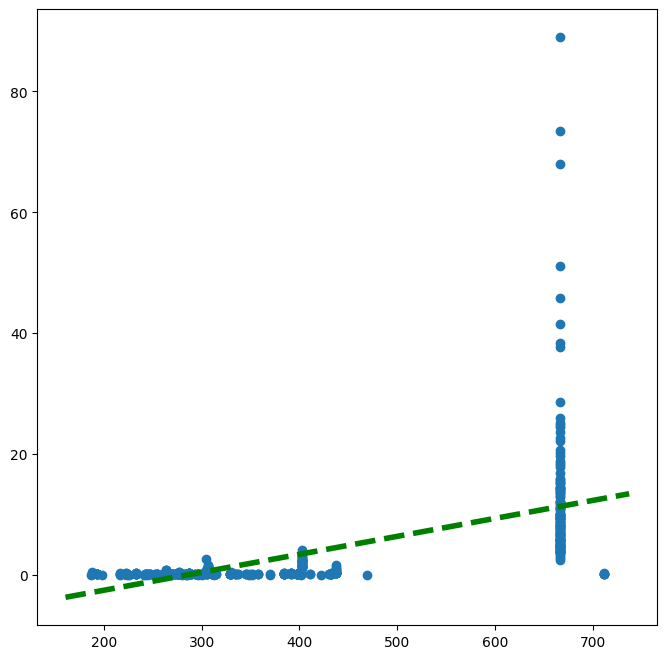

----------------------------------------------------------
Results for ptratio
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.94e-11
Time:                        11:53:56   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

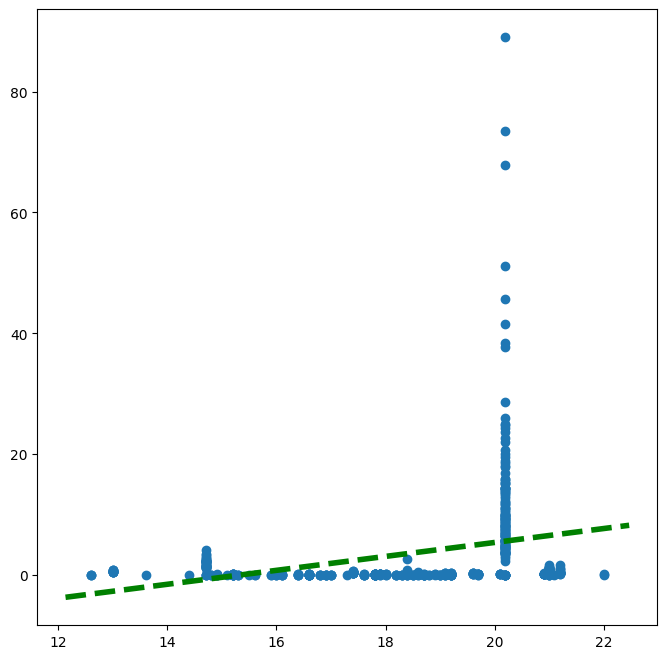

----------------------------------------------------------
Results for lstat
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.65e-27
Time:                        11:53:56   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

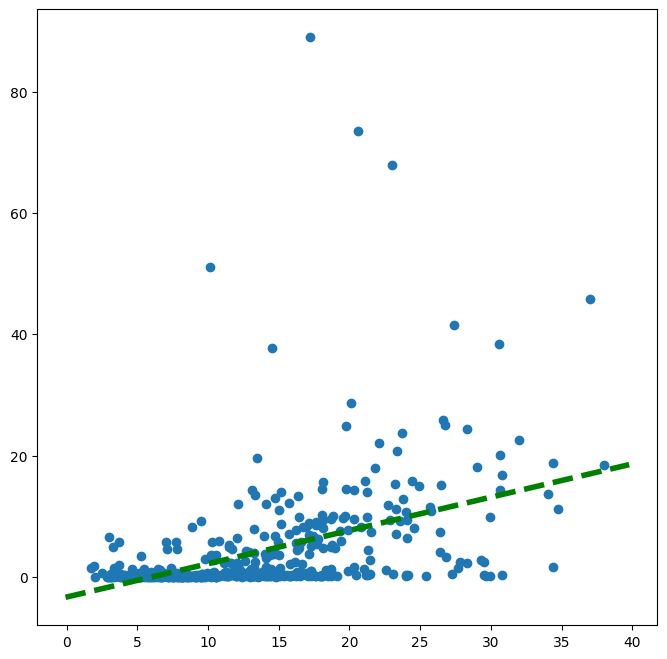

----------------------------------------------------------
Results for medv
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.17e-19
Time:                        11:53:56   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

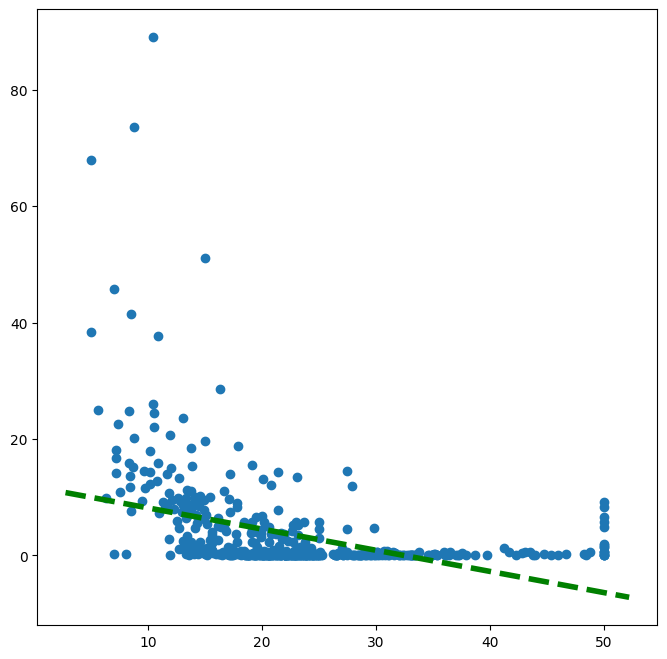

----------------------------------------------------------


In [139]:
y=Boston['crim'] #All predictors except chas have a small p-value
L=[0] #a list that keeps track of the parameters
for i in range (1,len(Boston.columns)):
    print("Results for "+Boston.columns[i])
    results=sm.OLS(y,sm.add_constant(Boston.iloc[:,i])).fit()
    print(results.summary())
    L.append(results.params[1])
    fig, ax = subplots(figsize=(8,8));
    ax.scatter(Boston.iloc[:,i], y)
    abline(ax,results.params[0],results.params[1],'g--',linewidth=4)
    show()
    print("----------------------------------------------------------")

In [142]:
results=sm.OLS(y,sm.add_constant(Boston.iloc[:,1:])).fit()
results.summary() #We reject the null hypothesis for medv, rad, dis, zn

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.03e-56
Time:                        11:54:09   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[0,
 -0.07393497740412368,
 0.5097763311042306,
 -1.892776550803758,
 31.248531201122923,
 -2.684051224113948,
 0.1077862271395331,
 -1.5509016824100994,
 0.6179109273272014,
 0.02974225282276537,
 1.1519827870705872,
 0.5488047820623981,
 -0.363159922257603]

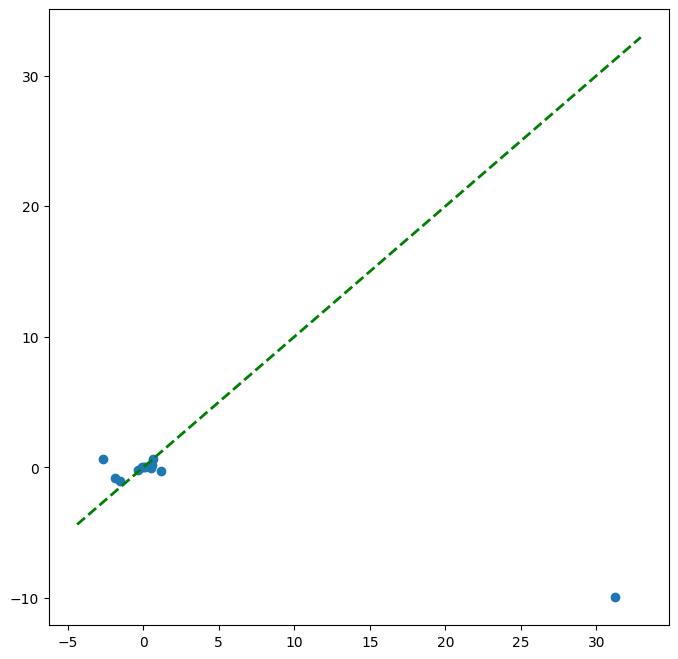

In [145]:
fig, ax = subplots(figsize=(8,8));
ax.scatter(L[1:], results.params[1:])
abline(ax,0,1,'g--',linewidth=2)

In [157]:
y=Boston['crim'] #All predictors except chas have a small p-value
L1=[0] #a list that keeps track of the R2 statistic for the linear model
L2=[0] #a list that keeps track of the R2 statistic for the cubic model
for i in range (1,len(Boston.columns)):
    print("Results for "+Boston.columns[i])
    results=sm.OLS(y,sm.add_constant(Boston.iloc[:,i])).fit()
    a=results.rsquared
    b=sm.OLS(y,sm.add_constant(list(zip(Boston.iloc[:,i],Boston.iloc[:,i]**2,Boston.iloc[:,i]**3)))).fit().rsquared
    print("Linear: "+str(a))
    print("Cubic: "+str(b))
    

Results for zn
Linear: 0.04018790803211081
Cubic: 0.0582419742225837
Results for indus
Linear: 0.16531007043075163
Cubic: 0.2596578579195663
Results for chas
Linear: 0.0031238689633057426
Cubic: 0.0031210563494256105
Results for nox
Linear: 0.17721718179269375
Cubic: 0.2969778956287349
Results for rm
Linear: 0.04806911671608338
Cubic: 0.06778606116878627
Results for age
Linear: 0.12442145175894648
Cubic: 0.17423099358657346
Results for dis
Linear: 0.1441493749253987
Cubic: 0.27782477308673637
Results for rad
Linear: 0.39125668674998904
Cubic: 0.40003687202422356
Results for tax
Linear: 0.3396142433788123
Cubic: 0.3688820796629598
Results for ptratio
Linear: 0.08406843894373617
Cubic: 0.1137815774469838
Results for lstat
Linear: 0.20759093253433547
Cubic: 0.21793243242225613
Results for medv
Linear: 0.15078046904975728
Cubic: 0.4202002565634154


In [158]:
# We could also do some plots of cubic regression or of the residuals of the linear model